## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print(len(merged_data["Mouse ID"].unique()))
print(len(merged_data["Mouse ID"]))

249
1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

all_dup_mouse = merged_data[merged_data.duplicated(['Mouse ID'])]
all_dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(['Mouse ID', 'Timepoint'])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_data["Mouse ID"].unique()))
print(len(clean_data["Mouse ID"]))

249
1888


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_data = clean_data.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = grouped_data["Tumor Volume (mm3)"].mean()
median = grouped_data["Tumor Volume (mm3)"].median()
variance = grouped_data["Tumor Volume (mm3)"].var()
st_dev = grouped_data["Tumor Volume (mm3)"].std()
sem = grouped_data["Tumor Volume (mm3)"].sem()

#round for 2 decimals
mean = round(mean,2)
median = round(median,2)
variance = round(variance,2)
st_dev =round(st_dev,2)
sem = round(sem,2)

# Assemble the resulting series into a single summary dataframe.

summary = pd.DataFrame({"Mean" : mean, "Median" : median, "Variance" : variance, "Standard Deviation" : st_dev, "SEM" : sem})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


agg_summary = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

agg_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

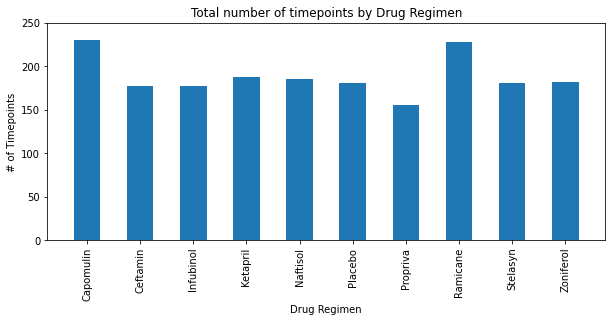

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_by_drug = clean_data.groupby(["Drug Regimen"])["Timepoint"].count()

timepoint_by_drug.plot(kind="bar", figsize=(10,4))

#Add title and labels
plt.title("Total number of timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Timepoints")

#set X and Y limits
plt.xlim(-0.75, len(timepoint_by_drug)-0.25)
plt.ylim(0, 250)

#show graphic
plt.show()
plt.tight_layout()

In [10]:
timepoint_by_drug


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

(0.0, 250.0)

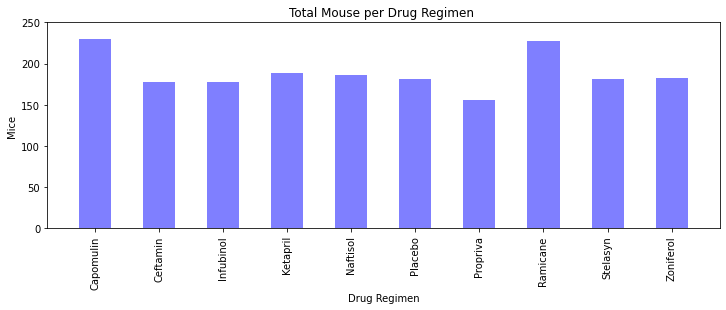

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(timepoint_by_drug))
tick_locations = [value for value in x_axis]

#Create bar chart
plt.figure(figsize=(10,4))
plt.bar(x_axis, timepoint_by_drug, color='b',alpha=0.5, width =0.5, align="center")
plt.xticks(tick_locations, timepoint_by_drug.index.values, rotation="vertical") 
plt.tight_layout()

#Add title and labels
plt.title("Total Mouse per Drug Regimen ")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")

#set X and Y limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 250)


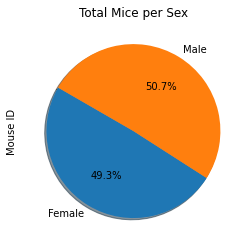

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_sex = pd.DataFrame(clean_data.groupby("Sex").count()['Mouse ID'])
mouse_sex



labels = mouse_sex.index.values
mouse_sex.plot(kind="pie", y="Mouse ID", autopct="%1.1f%%", startangle = 150, shadow=True, labels= labels, legend=False)

#Add title
plt.title("Total Mice per Sex")

#show graphic
plt.show()
plt.tight_layout()

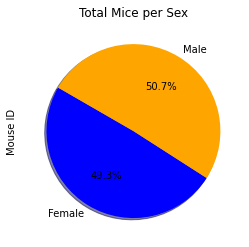

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = ["Female", "Male"]
mouse = (clean_data.groupby("Sex").count()['Mouse ID']).tolist()
colors = ["blue","orange"]
explode = (0,0)

# Create pie chart
plt.pie(mouse, explode=explode, labels=gender, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("Total Mice per Sex")
plt.ylabel("Mouse ID")

# Show graphic
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_regimens = clean_data[(merged_data["Drug Regimen"] == "Capomulin")|(merged_data["Drug Regimen"] == "Ramicane")|(merged_data["Drug Regimen"] == "Infubinol")|(merged_data["Drug Regimen"] == "Ceftamin")]
#four_regimens["Drug Regimen"].unique()
grouped_four_regimens = four_regimens.groupby("Mouse ID")

# Start by getting the last (greatest) timepoint for each mouse
last_timeline = grouped_four_regimens.last()["Timepoint"]

last_timeline

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_last_timeline = pd.merge(last_timeline , four_regimens, on=("Mouse ID", "Timepoint"), how="left")

merged_last_timeline

/Users/pedrogomez/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

merged_last_timeline["Drug Regimen"].values

Treatments = set(merged_last_timeline["Drug Regimen"].values)

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in Treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_last_timeline.loc[merged_last_timeline["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers for {treatment}.")
    print(f"Values above {upper_bound} could be outliers for {treatment}.")

Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.


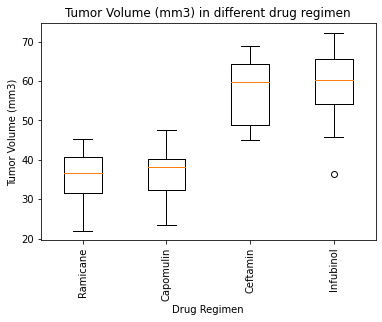

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#create graphic
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volume_list)

# Create title and labels
ax1.set_title('Tumor Volume (mm3) in different drug regimen')
plt.xticks(ticks = range(1, len(Treatments)+1), labels = Treatments, rotation=90)
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')

#print graphic
plt.show()

## Line and Scatter Plots

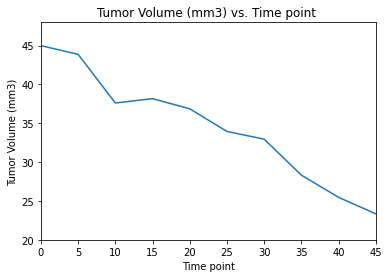

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


#capomulin data
capomulin_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")]
capomulin_df
                            
#one mouse data
capomulin_mouse_df = capomulin_df.loc[(clean_data["Mouse ID"] == "s185")]
capomulin_mouse_df

#create dataframe for timepoint and tumor volume
capomulin_mouse_timepoint = capomulin_mouse_df["Timepoint"]
capomulin_mouse_tumor = capomulin_mouse_df["Tumor Volume (mm3)"]



plt.plot(capomulin_mouse_timepoint, capomulin_mouse_tumor)

#Add title and labels
plt.title("Tumor Volume (mm3) vs. Time point ")
plt.xlabel("Time point")
plt.ylabel("Tumor Volume (mm3)")

#set X and Y limits
plt.xlim(0, 45)
plt.ylim(20, 48)

#show graphic
plt.show()
plt.tight_layout()

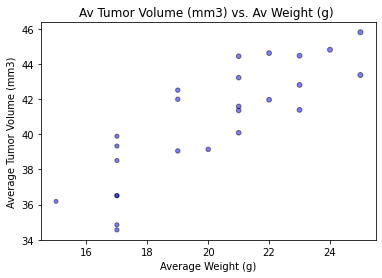

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


#calculate weight and tumor average
mouse_weight = capomulin_df.groupby("Mouse ID").mean()["Weight (g)"]
tumor_volume = capomulin_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
                    
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.scatter(mouse_weight, tumor_volume, marker="o", facecolors="blue", edgecolors="black",
            s=mouse_weight, alpha=0.5)

#Add title and labels
plt.title("Av Tumor Volume (mm3) vs. Av Weight (g) ")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#show graphic
plt.show()

## Correlation and Regression

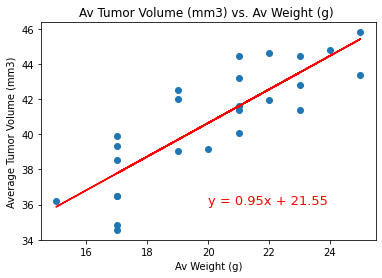

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = mouse_weight
y_values = tumor_volume

#calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=13,color="red")
plt.title("Av Tumor Volume (mm3) vs. Av Weight (g) ")
plt.xlabel("Av Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#print
plt.show()